# ML101 Workshop — Income Dataset Activity
*Prepared by: SMLB*

In this activity, we’ll explore the **Adult Income dataset**, which contains demographic and work information for individuals, along with whether they earn more than \$50K per year.

We will:
- Practice **cleaning data** (removing or handling missing values).
- Perform **basic descriptive analysis**.
- Create **visuals** (charts and plots) to tell a business story.

> Note: No coding experience needed! Just run each cell and discuss the insights.

## Step 1: Load the Data

We’ll load the dataset from Google Drive and put it into a table (DataFrame).  

This gives us:
- Columns like **age, education, hours worked, occupation, sex, income**.  
- A starting point for cleaning and analysis.

In [37]:
!pip -q install gdown
import gdown, pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your Drive file
url = "https://drive.google.com/uc?id=1PHqHLFP6OGXlxDPuGJqYQ9uqqy8nzcCE"
gdown.download(url, "adult.csv", quiet=False)

# Use the header in the CSV (header=0) and strip spaces after commas
df = pd.read_csv("adult.csv", header=0, skipinitialspace=True)

# Normalize a couple column names that differ across versions
df.rename(columns={"gender": "sex", "educational-num": "education-num"}, inplace=True)

# Clean the target column (sometimes has a trailing '.')
df["income"] = df["income"].astype(str).str.replace(".", "", regex=False).str.strip()

df = df.replace('?', np.nan)


Downloading...
From: https://drive.google.com/uc?id=1PHqHLFP6OGXlxDPuGJqYQ9uqqy8nzcCE
To: /content/adult.csv
100%|██████████| 5.33M/5.33M [00:00<00:00, 49.6MB/s]


## Understanding the Columns in Our Dataset

Here’s what each column means:

1. **age** → Person’s age (numeric).  
2. **workclass** → Type of employer (e.g., Private, Self-employed, Government).  
3. **fnlwgt** → Census sampling weight (how many people this row represents).  
   - *We won’t use this in our analysis.*  
4. **education** → Highest education level (e.g., Bachelors, HS-grad, Some-college).  
5. **education-num** → Numeric version of education level (e.g., HS-grad = 9, Bachelors = 13).  
6. **marital-status** → Relationship status (e.g., Never-married, Married-civ-spouse, Divorced).  
7. **occupation** → Type of job (e.g., Tech-support, Sales, Craft-repair).  
8. **relationship** → Role in the household (e.g., Husband, Wife, Own-child, Not-in-family).  
9. **race** → Self-identified race (e.g., White, Black, Asian-Pac-Islander).  
10. **sex** → Gender (Male or Female).  
11. **capital-gain** → Extra income from investments (e.g., stocks, real estate).  
12. **capital-loss** → Money lost from investments.  
13. **hours-per-week** → Average hours worked per week.  
14. **native-country** → Country of origin (e.g., United-States, Mexico, India).  
15. **income** → **Target column**: whether the person earns `<=50K` or `>50K` per year.  

---

In [38]:
df.head(15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Handling Missing Data (NaN values)

Real-world datasets are **rarely perfect** — people skip questions on surveys, systems record blanks, or information just isn’t available.  
In our dataset, missing values originally appeared as `?`. We’ve converted these to **NaN** (Not a Number), which pandas uses to mark missing entries.

### What do we do with missing data?
1. **Remove them**  
   - If there are only a small number of missing rows, it’s safe to just drop them.  
   - This keeps the dataset clean without losing too much information.

2. **Impute (fill in) the missing values**  
   - If many rows are missing, removing them would throw away too much data.  
   - Instead, we *impute* (fill in) the missing values with something reasonable:  
     - For **numbers** → use the **median** (middle value).  
     - For **categories** → use `"Unknown"` or the most common category.  

> In this activity, we will **remove rows with NaN values** for simplicity.  
This keeps things simple and lets us focus on analysis.


In [39]:
# Count and display NaN (missing) values for each column
print("Missing values (NaN) by column:\n")
for col in df.columns:
    missing_count = df[col].isna().sum()
    if missing_count > 0:
        print(f"- Column '{col}' has {missing_count} missing values.")
    else:
        print(f"- Column '{col}' has no missing values.")

# Remove rows with any NaN values
before_shape = df.shape
df = df.dropna().copy()
after_shape = df.shape

print("\nData cleaned!")
print(f"Before: {before_shape[0]} rows, {before_shape[1]} columns")
print(f"After:  {after_shape[0]} rows, {after_shape[1]} columns")
print(f"Removed {before_shape[0] - after_shape[0]} rows containing missing values.")


Missing values (NaN) by column:

- Column 'age' has no missing values.
- Column 'workclass' has 2799 missing values.
- Column 'fnlwgt' has no missing values.
- Column 'education' has no missing values.
- Column 'education-num' has no missing values.
- Column 'marital-status' has no missing values.
- Column 'occupation' has 2809 missing values.
- Column 'relationship' has no missing values.
- Column 'race' has no missing values.
- Column 'sex' has no missing values.
- Column 'capital-gain' has no missing values.
- Column 'capital-loss' has no missing values.
- Column 'hours-per-week' has no missing values.
- Column 'native-country' has 857 missing values.
- Column 'income' has no missing values.

Data cleaned!
Before: 48842 rows, 15 columns
After:  45222 rows, 15 columns
Removed 3620 rows containing missing values.


## Income Distribution (Bar Chart)

This chart shows the number of people in each **income group**:

- `<=50K` → individuals earning $50,000 or less per year.  
- `>50K` → individuals earning more than $50,000 per year.  

Why this matters:
- It gives us a **quick snapshot** of how the dataset is split.  
- If one group is much larger than the other, it tells us the dataset is **imbalanced**.  
- For a business, this is like knowing the **customer base breakdown** (e.g., budget vs. premium customers).

> Question for discussion:  
*If this dataset represented your company’s customers, how would this income distribution affect your marketing or product strategy?*


<Axes: title={'center': 'Income Distribution'}, xlabel='income'>

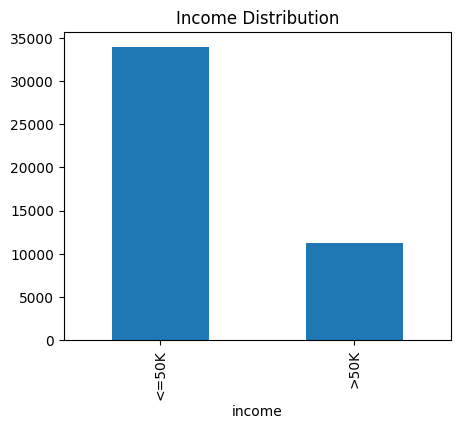

In [40]:
df["income"].value_counts().plot(
    kind="bar", title="Income Distribution", figsize=(5,4)
)


## Income by Gender (Stacked Bar)

Shows the **proportion** of `<=50K` vs `>50K` **within each gender**.

- Bars = genders; segments = income groups
- Each bar sums to **100%** (easy comparison)

**Discuss:** Do you see a gap? What might explain it?


<Axes: title={'center': 'Income Distribution by Gender'}, xlabel='sex'>

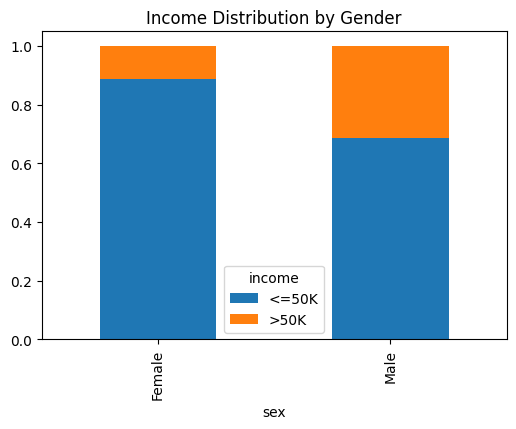

In [41]:
df.groupby("sex")["income"].value_counts(normalize=True).unstack().plot(
    kind="bar", stacked=True, figsize=(6,4),
    title="Income Distribution by Gender"
)

## Age Distribution by Income (Boxplot)

This boxplot compares **ages** across the two income groups.

- The line in each box = median age  
- Boxes show where most ages fall  
- Dots/outliers = unusual values  

**Discuss:** At what ages do higher incomes become more common?


Text(0.5, 0.98, '')

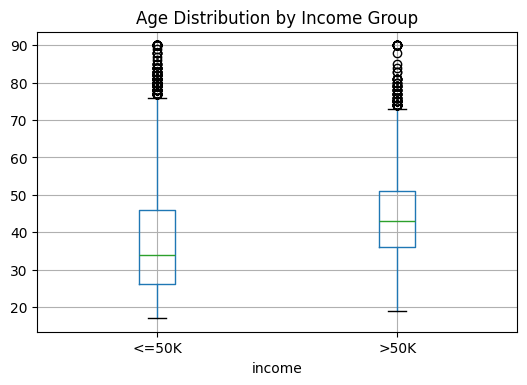

In [42]:
df.boxplot(column="age", by="income", figsize=(6,4))
plt.title("Age Distribution by Income Group")
plt.suptitle("")

## Proportion >50K by Education

This chart shows the **share of people earning >50K** for each education level.

- Bars = education levels  
- Length = proportion of high earners  

**Discuss:** Which education levels lead to higher incomes? Any surprises?


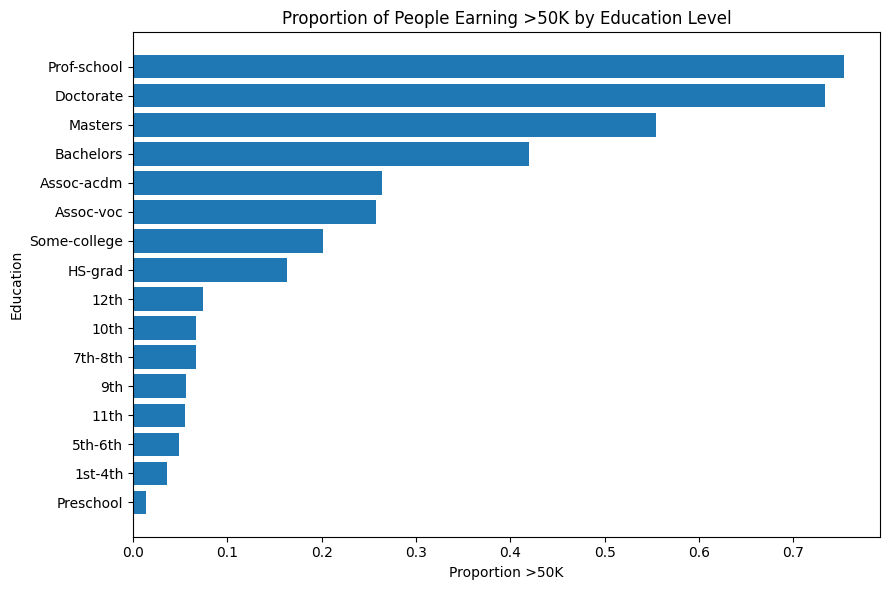

In [43]:
# Compute proportion >50K per education level
edu_counts = df.groupby("education")["income"].value_counts().unstack(fill_value=0)
edu_prop_high = (edu_counts.get(">50K", 0) / edu_counts.sum(axis=1)).sort_values()

plt.figure(figsize=(9,6))
plt.barh(edu_prop_high.index, edu_prop_high.values)
plt.title("Proportion of People Earning >50K by Education Level")
plt.xlabel("Proportion >50K")
plt.ylabel("Education")
plt.tight_layout()
plt.show()


## Hours Worked per Week by Income (Boxplot)

This boxplot compares **weekly work hours** across income groups.

- Each box = range of typical hours  
- Median line = midpoint of hours worked  

**Discuss:** Do higher earners usually work more hours, or is the difference small?


/tmp/ipython-input-3172826279.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hours_low, hours_high], labels=["<=50K", ">50K"], showfliers=False)


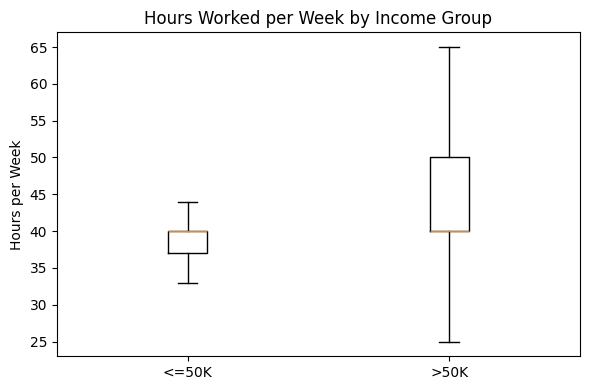

In [44]:
# Split hours by income group
hours_low  = df.loc[df["income"]=="<=50K", "hours-per-week"].values
hours_high = df.loc[df["income"]==">50K",  "hours-per-week"].values

plt.figure(figsize=(6,4))
plt.boxplot([hours_low, hours_high], labels=["<=50K", ">50K"], showfliers=False)
plt.title("Hours Worked per Week by Income Group")
plt.ylabel("Hours per Week")
plt.tight_layout()
plt.show()


## Average Hours Worked by Education

This chart shows the **average weekly work hours** for each education level.

- Bars = education levels  
- Length = average hours worked  

**Discuss:** Which groups work the longest hours? Does it match your expectations?


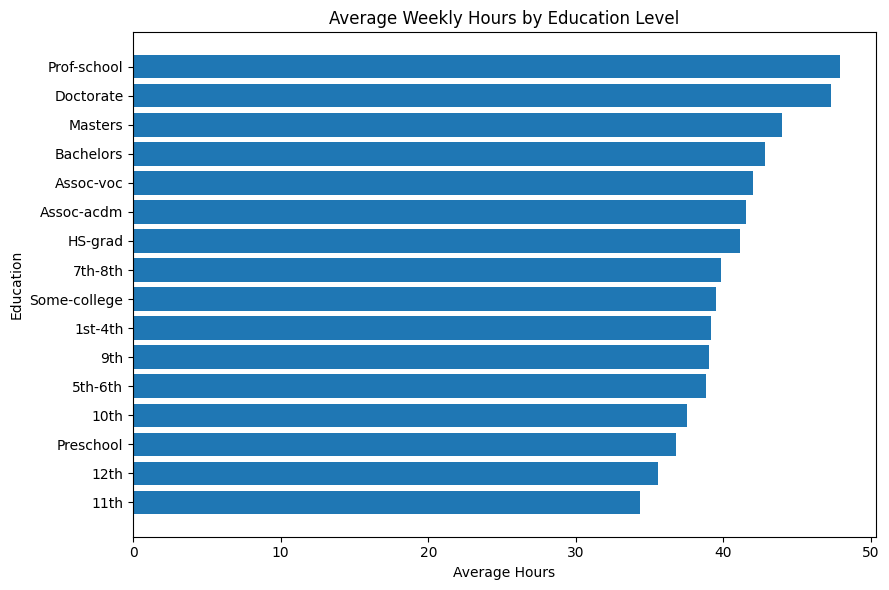

In [45]:
edu_hours = df.groupby("education")["hours-per-week"].mean().sort_values()

plt.figure(figsize=(9,6))
plt.barh(edu_hours.index, edu_hours.values)
plt.title("Average Weekly Hours by Education Level")
plt.xlabel("Average Hours")
plt.ylabel("Education")
plt.tight_layout()
plt.show()


## Top 10 Occupations by High-Income Share

This chart shows the **top 10 occupations** ranked by the proportion of people earning >50K.

- Bars = occupations  
- Length = share of high earners  

**Discuss:** Which jobs have the highest chance of >50K? Any that surprise you?


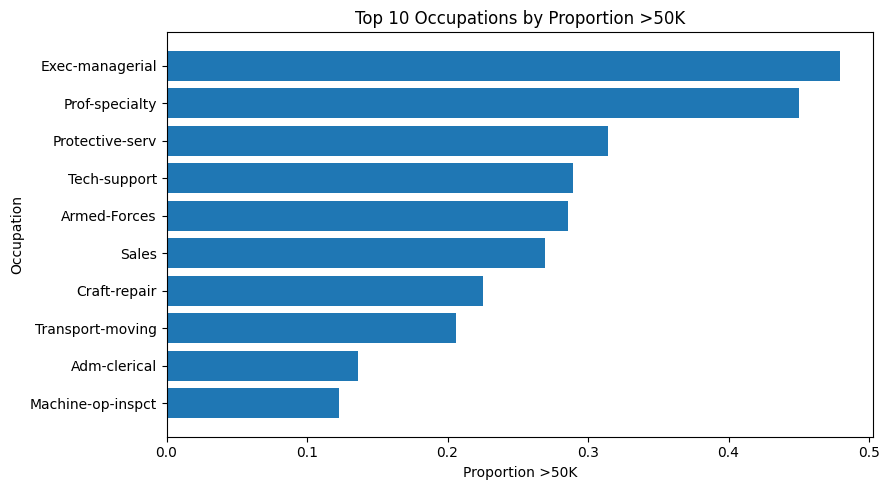

In [46]:
occ_tab = df.groupby("occupation")["income"].value_counts(normalize=True).unstack(fill_value=0)
top_occ = occ_tab[">50K"].sort_values(ascending=False).head(10)

plt.figure(figsize=(9,5))
plt.barh(top_occ.index[::-1], top_occ.values[::-1])
plt.title("Top 10 Occupations by Proportion >50K")
plt.xlabel("Proportion >50K")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()
